First 5 rows:
    year    month   originCountry  totalCount  dollarRate  \
0  2024  January           India       34399       315.7   
1  2024  January          Russia       31159       315.7   
2  2024  January  United Kingdom       16665       315.7   
3  2024  January         Germany       13593       315.7   
4  2024  January           China       11511       315.7   

   apparent_temperature_mean_celcius  sunshine_duration_seconds  rain_sum_mm  \
0                          30.787654                33462.04969      7.67284   
1                          30.787654                33462.04969      7.67284   
2                          30.787654                33462.04969      7.67284   
3                          30.787654                33462.04969      7.67284   
4                          30.787654                33462.04969      7.67284   

   precipitation_hours  num_establishments  num_rooms  AirPassengerFaresIndex  \
0             7.012346                4519      55455         

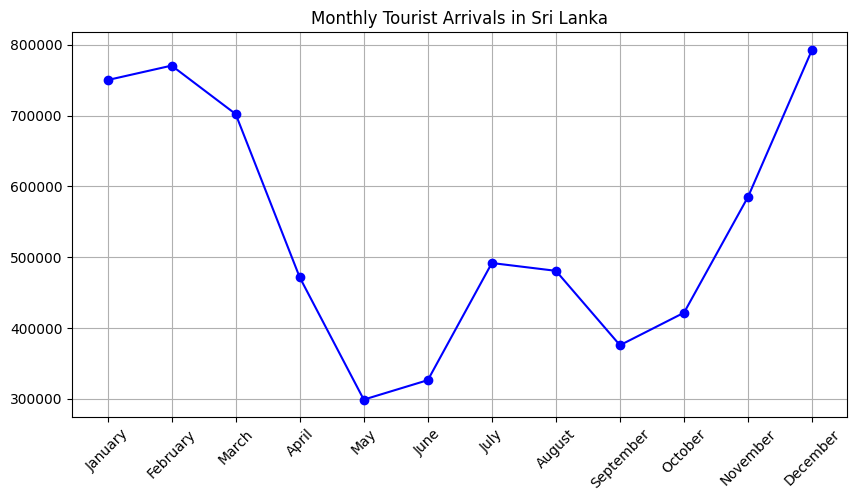

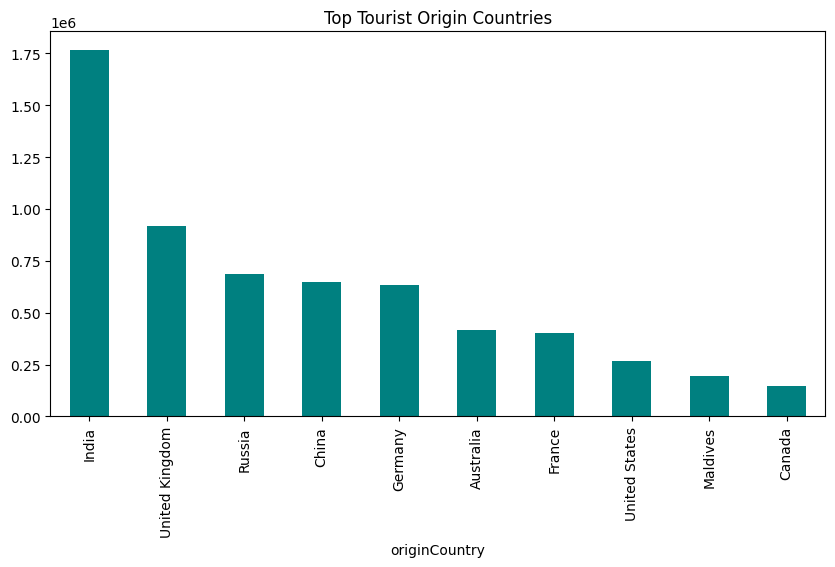

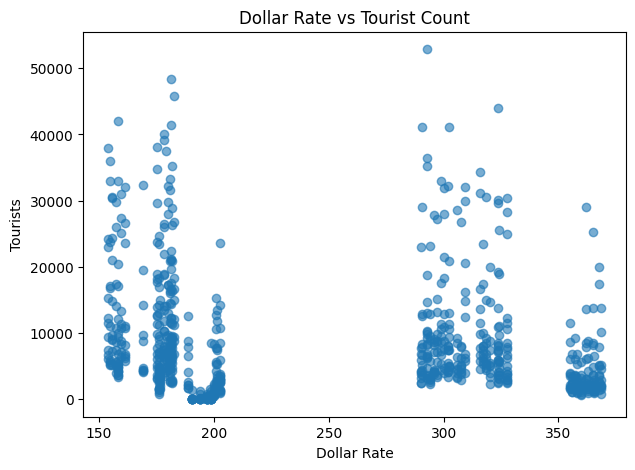


Correlation between numeric features:
                                    year  totalCount  dollarRate  \
year                               1.00       -0.12        0.82   
totalCount                        -0.12        1.00       -0.11   
dollarRate                         0.82       -0.11        1.00   
apparent_temperature_mean_celcius  0.34        0.19        0.02   
sunshine_duration_seconds         -0.14        0.17       -0.28   
rain_sum_mm                        0.08       -0.15        0.05   
precipitation_hours               -0.21       -0.25       -0.18   
num_establishments                 0.99       -0.17        0.80   
num_rooms                          0.99       -0.14        0.78   
AirPassengerFaresIndex            -0.00        0.24        0.26   
consumerPriceIndex                 0.26        0.15        0.19   

                                   apparent_temperature_mean_celcius  \
year                                                            0.34   
totalCount 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("touristData.csv")

print("First 5 rows:\n", df.head())
df.info()
print("\nSummary Statistics:\n", df.describe().round(2))

print("\nMissing values per column:\n", df.isnull().sum())

df = df.drop_duplicates()

month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
df["month"] = pd.Categorical(df["month"], categories=month_order, ordered=True)

# Top 10 origin countries by total tourist count
top10 = df.groupby("originCountry")["totalCount"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Tourist Origin Countries:\n", top10)

# Total tourists by month
monthly = df.groupby("month")["totalCount"].sum()
print("\nMonthly Tourist Arrivals:\n", monthly)

# Total tourists by year
yearly = df.groupby("year")["totalCount"].sum()
print("\nYearly Tourist Arrivals:\n", yearly)

#Visualize monthly tourist arrivals in Sri Lanka
plt.figure(figsize=(10,5))
plt.plot(monthly.index, monthly.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title("Monthly Tourist Arrivals in Sri Lanka")
plt.grid(True)
plt.show()

#Visualize top 10 tourist origin countries
plt.figure(figsize=(10,5))
top10.plot(kind="bar", color="teal")
plt.title("Top Tourist Origin Countries")
plt.show()

#Explore relationship between dollar rate and tourist count
plt.figure(figsize=(7,5))
plt.scatter(df["dollarRate"], df["totalCount"], alpha=0.6)
plt.xlabel("Dollar Rate")
plt.ylabel("Tourists")
plt.title("Dollar Rate vs Tourist Count")
plt.show()

print("\nCorrelation between numeric features:\n", df.corr(numeric_only=True).round(2))

X = df[[
    "dollarRate",
    "rain_sum_mm",
    "sunshine_duration_seconds",
    "num_rooms",
    "consumerPriceIndex"
]]
y = df["totalCount"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

print("\nR2 Score:", round(model.score(X_test, y_test), 3))
